In [ ]:
rm -r /content/cleaned_sales_data

In [ ]:
!pip install pyngrok

In [ ]:
file_path = "/content/Big Sales Data (1).csv"
data = spark.read.csv(file_path, header=True, inferSchema=True)

In [ ]:
spark.stop()
ngrok.kill()

1. Handling Missing Values with Mean

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import mean
from pyngrok import ngrok

# Initialize Spark Session
spark = SparkSession.builder \
    .appName("FillMissingValues") \
    .getOrCreate()
sc = spark.sparkContext

ngrok.set_auth_token("2odSwJKB9BfTPQ2yQi4yvla96tZ_5yHDvJjzdJMAJEFjjJeaP")
ngrok_tunnel = ngrok.connect(4040)
print(f"Spark Web UI available at {ngrok_tunnel.public_url}")

file_path = "/content/Big Sales Data (1).csv"
data = spark.read.csv(file_path, header=True, inferSchema=True)

item_weight_rdd = data.select('Item_Weight').rdd
mean_item_weight = item_weight_rdd.filter(lambda x: x[0] is not None).map(lambda x: x[0]).mean()
data = data.na.fill({'Item_Weight': mean_item_weight})

# Result
data.select('Item_Weight').show(10)


Spark Web UI available at https://3bcf-34-168-208-216.ngrok-free.app
+-----------+
|Item_Weight|
+-----------+
|       12.3|
|       12.3|
|       12.3|
|       12.3|
|        9.8|
|       12.3|
|      7.855|
|      7.855|
|      7.855|
|       12.3|
+-----------+
only showing top 10 rows



2. Standardize Categorical Data

In [ ]:

from pyspark.sql.functions import when, col
from pyspark.sql.window import Window

# Initialize Spark Session
spark = SparkSession.builder \
    .appName("StandardizeColumn") \
    .getOrCreate()
sc = spark.sparkContext

ngrok.set_auth_token("2odSwJKB9BfTPQ2yQi4yvla96tZ_5yHDvJjzdJMAJEFjjJeaP")
ngrok_tunnel = ngrok.connect(4040)
print(f"Spark Web UI available at {ngrok_tunnel.public_url}")

file_path = "/content/Big Sales Data (1).csv"
data = spark.read.csv(file_path, header=True, inferSchema=True)


window_spec = Window.partitionBy("Outlet_Type")
data = data.withColumn("Item_Fat_Content", when(col("Item_Fat_Content") == "LF", "Low Fat")
                                         .when(col("Item_Fat_Content") == "low fat", "Low Fat")
                                         .when(col("Item_Fat_Content") == "reg", "Regular")
                                         .otherwise(col("Item_Fat_Content")))


# Result
data.select("Item_Fat_Content").distinct().show()


Spark Web UI available at https://beb0-34-168-208-216.ngrok-free.app
+----------------+
|Item_Fat_Content|
+----------------+
|         Low Fat|
|         Regular|
+----------------+



In [ ]:
from pyspark.sql.window import Window
from pyspark.sql.functions import row_number

# Define a window spec to identify duplicates based on 'Outlet_Identifier'
window_spec = Window.partitionBy("Outlet_Identifier").orderBy("Outlet_Establishment_Year")
data = data.withColumn("row_num", row_number().over(window_spec))

# Removing duplicates by keeping only the first occurrence
data = data.filter(col("row_num") == 1).drop("row_num")

# Result
data.show(10)


+---------------+-----------+----------------+---------------+------------+--------+-----------------+-------------------------+-----------+--------------------+-----------------+-----------------+
|Item_Identifier|Item_Weight|Item_Fat_Content|Item_Visibility|   Item_Type|Item_MRP|Outlet_Identifier|Outlet_Establishment_Year|Outlet_Size|Outlet_Location_Type|      Outlet_Type|Item_Outlet_Sales|
+---------------+-----------+----------------+---------------+------------+--------+-----------------+-------------------------+-----------+--------------------+-----------------+-----------------+
|          FDT36|       12.3|         Low Fat|    0.186250852|Baking Goods| 37.2874|           OUT010|                     1998|     Medium|              Tier 3|    Grocery Store|          176.437|
|          FDQ36|      7.855|         Regular|    0.161413005|Baking Goods| 35.2848|           OUT013|                     1987|       High|              Tier 3|Supermarket Type1|      299.3350723|
|         

Dropping unnecessary column

In [ ]:
from pyspark.sql import SparkSession

# Initialize Spark Session
spark = SparkSession.builder \
    .appName("DropColumn") \
    .getOrCreate()
sc = spark.sparkContext

ngrok.set_auth_token("2odSwJKB9BfTPQ2yQi4yvla96tZ_5yHDvJjzdJMAJEFjjJeaP")
ngrok_tunnel = ngrok.connect(4040)
print(f"Spark Web UI available at {ngrok_tunnel.public_url}")

# Check if 'Outlet_Identifier' exists before dropping
if 'Outlet_Identifier' in data.columns:
    data = data.drop('Outlet_Identifier')

# Result
data.show(5)


Spark Web UI available at https://b504-34-168-208-216.ngrok-free.app
+---------------+-----------+----------------+---------------+------------+--------+-------------------------+-----------+--------------------+-----------------+-----------------+
|Item_Identifier|Item_Weight|Item_Fat_Content|Item_Visibility|   Item_Type|Item_MRP|Outlet_Establishment_Year|Outlet_Size|Outlet_Location_Type|      Outlet_Type|Item_Outlet_Sales|
+---------------+-----------+----------------+---------------+------------+--------+-------------------------+-----------+--------------------+-----------------+-----------------+
|          FDT36|       12.3|         Low Fat|    0.186250852|Baking Goods| 37.2874|                     1998|     Medium|              Tier 3|    Grocery Store|          176.437|
|          FDQ36|      7.855|         Regular|    0.161413005|Baking Goods| 35.2848|                     1987|       High|              Tier 3|Supermarket Type1|      299.3350723|
|          FDT36|       12.3|  

Creating new row

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, expr

# Initialize Spark Session
spark = SparkSession.builder \
    .appName("CalculateOutletAge") \
    .getOrCreate()
sc = spark.sparkContext

ngrok.set_auth_token("2odSwJKB9BfTPQ2yQi4yvla96tZ_5yHDvJjzdJMAJEFjjJeaP")
ngrok_tunnel = ngrok.connect(4040)
print(f"Spark Web UI available at {ngrok_tunnel.public_url}")

# Add a new column 'Outlet_Age' based on 'Outlet_Establishment_Year'
data = data.withColumn("Outlet_Age", expr("2024 - Outlet_Establishment_Year"))

# Result
data.select("Outlet_Establishment_Year", "Outlet_Age").show(10)


Spark Web UI available at https://1884-34-168-208-216.ngrok-free.app
+-------------------------+----------+
|Outlet_Establishment_Year|Outlet_Age|
+-------------------------+----------+
|                     1999|        25|
|                     2007|        17|
|                     2009|        15|
|                     1985|        39|
|                     2007|        17|
|                     1997|        27|
|                     1987|        37|
|                     1985|        39|
|                     2002|        22|
|                     2002|        22|
+-------------------------+----------+
only showing top 10 rows



Datetime conversion

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, to_date
from pyspark.sql.types import StringType

# Initialize Spark Session
spark = SparkSession.builder \
    .appName("ConvertToDatetime") \
    .getOrCreate()
sc = spark.sparkContext

ngrok.set_auth_token("2odSwJKB9BfTPQ2yQi4yvla96tZ_5yHDvJjzdJMAJEFjjJeaP")
ngrok_tunnel = ngrok.connect(4040)
print(f"Spark Web UI available at {ngrok_tunnel.public_url}")

data = data.withColumn("Outlet_Establishment_Year", col("Outlet_Establishment_Year").cast(StringType()))

# Convert 'Outlet_Establishment_Year' to datetime (year format)
data = data.withColumn("Outlet_Establishment_Year", to_date(col("Outlet_Establishment_Year"), format='yyyy'))

# Result
data.select("Outlet_Establishment_Year").show(10)


Spark Web UI available at https://f002-34-168-208-216.ngrok-free.app
+-------------------------+
|Outlet_Establishment_Year|
+-------------------------+
|               1999-01-01|
|               2007-01-01|
|               2009-01-01|
|               1985-01-01|
|               2007-01-01|
|               1997-01-01|
|               1987-01-01|
|               1985-01-01|
|               2002-01-01|
|               2002-01-01|
+-------------------------+
only showing top 10 rows



Encoding Categorical Variables

In [ ]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import StringIndexer, OneHotEncoder
from pyspark.ml import Pipeline

# Initialize Spark Session
spark = SparkSession.builder \
    .appName("OneHotEncoding") \
    .getOrCreate()
sc = spark.sparkContext

ngrok.set_auth_token("2odSwJKB9BfTPQ2yQi4yvla96tZ_5yHDvJjzdJMAJEFjjJeaP")
ngrok_tunnel = ngrok.connect(4040)
print(f"Spark Web UI available at {ngrok_tunnel.public_url}")

# StringIndexer to convert 'Outlet_Type' to numeric index
indexer = StringIndexer(inputCol="Outlet_Type", outputCol="Outlet_Type_Index")

# OneHotEncoder to perform one-hot encoding on the index
encoder = OneHotEncoder(inputCol="Outlet_Type_Index", outputCol="Outlet_Type_OneHot")

file_path = "/content/Big Sales Data (1).csv"
data = spark.read.csv(file_path, header=True, inferSchema=True)

pipeline = Pipeline(stages=[indexer, encoder])

# Fit and transform the data
model = pipeline.fit(data)
encoded_data = model.transform(data)

# Result
encoded_data.select("Outlet_Type", "Outlet_Type_OneHot").show(10)


Spark Web UI available at https://f5e1-34-168-208-216.ngrok-free.app
+-----------------+------------------+
|      Outlet_Type|Outlet_Type_OneHot|
+-----------------+------------------+
|Supermarket Type1|     (3,[0],[1.0])|
|Supermarket Type1|     (3,[0],[1.0])|
|Supermarket Type2|         (3,[],[])|
|    Grocery Store|     (3,[1],[1.0])|
|Supermarket Type1|     (3,[0],[1.0])|
|Supermarket Type1|     (3,[0],[1.0])|
|Supermarket Type1|     (3,[0],[1.0])|
|Supermarket Type3|     (3,[2],[1.0])|
|Supermarket Type1|     (3,[0],[1.0])|
|Supermarket Type1|     (3,[0],[1.0])|
+-----------------+------------------+
only showing top 10 rows



In [ ]:
data.show(15)

+---------------+-----------+----------------+---------------+------------+--------+-----------------+-------------------------+-----------+--------------------+-----------------+-----------------+
|Item_Identifier|Item_Weight|Item_Fat_Content|Item_Visibility|   Item_Type|Item_MRP|Outlet_Identifier|Outlet_Establishment_Year|Outlet_Size|Outlet_Location_Type|      Outlet_Type|Item_Outlet_Sales|
+---------------+-----------+----------------+---------------+------------+--------+-----------------+-------------------------+-----------+--------------------+-----------------+-----------------+
|          FDT36|       12.3|         Low Fat|    0.111447593|Baking Goods| 33.4874|           OUT049|                     1999|     Medium|              Tier 1|Supermarket Type1|      436.6087212|
|          FDT36|       12.3|         Low Fat|    0.111904005|Baking Goods| 33.9874|           OUT017|                     2007|     Medium|              Tier 2|Supermarket Type1|      443.1277212|
|         

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.evaluation import RegressionEvaluator, MulticlassClassificationEvaluator
from pyspark.ml.regression import LinearRegression
from pyspark.ml.classification import LogisticRegression, RandomForestClassifier, DecisionTreeClassifier, GBTClassifier
from pyspark.ml.clustering import KMeans

# Initialize Spark session
spark = SparkSession.builder.appName("MLlibModels").getOrCreate()

# Load the dataset
data = spark.read.csv("/content/Big Sales Data (1).csv", header=True, inferSchema=True)

# Preprocessing: Filter nulls and prepare for machine learning
data = data.na.drop()

# Assemble features
assembler = VectorAssembler(inputCols=['Item_Outlet_Sales'], outputCol='features')  # Add relevant features
data = assembler.transform(data)


1. Linear Regression

In [ ]:
from pyspark.sql import SparkSession
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.feature import VectorAssembler
import time

# Initialize Spark session
spark = SparkSession.builder.appName("LinearRegression").getOrCreate()

# Verify that there are no null values in the relevant columns
feature_columns = ['Item_Visibility', 'Item_Outlet_Sales', 'Item_MRP']  # Features and label
data = data.dropna(subset=feature_columns)

# Assemble features into a single vector
assembler = VectorAssembler(inputCols=['Item_Visibility', 'Item_Outlet_Sales'], outputCol="features")
data_features = assembler.transform(data)


# Split the data into training and testing
train_data, test_data = data_features.randomSplit([0.8, 0.2], seed=42)

# Initialize the Linear Regression model
lr = LinearRegression(featuresCol="features", labelCol="Item_MRP")

# Measure training time
start_time = time.time()
lr_model = lr.fit(train_data)
training_time = time.time() - start_time
print(f"Training Time: {training_time:.2f} seconds")

# Measure prediction time
start_time = time.time()
lr_predictions = lr_model.transform(test_data)
prediction_time = time.time() - start_time
print(f"Prediction Time: {prediction_time:.2f} seconds")

# Evaluate the model's performance
evaluator_rmse = RegressionEvaluator(labelCol="Item_MRP", predictionCol="prediction", metricName="rmse")
evaluator_mse = RegressionEvaluator(labelCol="Item_MRP", predictionCol="prediction", metricName="mse")
evaluator_r2 = RegressionEvaluator(labelCol="Item_MRP", predictionCol="prediction", metricName="r2")

# Compute regression metrics
rmse = evaluator_rmse.evaluate(lr_predictions)
mse = evaluator_mse.evaluate(lr_predictions)
r2 = evaluator_r2.evaluate(lr_predictions)

print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² (Coefficient of Determination): {r2:.2f}")


Training Time: 2.72 seconds
Prediction Time: 0.10 seconds
Root Mean Squared Error (RMSE): 51.45
Mean Squared Error (MSE): 2647.12
R² (Coefficient of Determination): 0.30


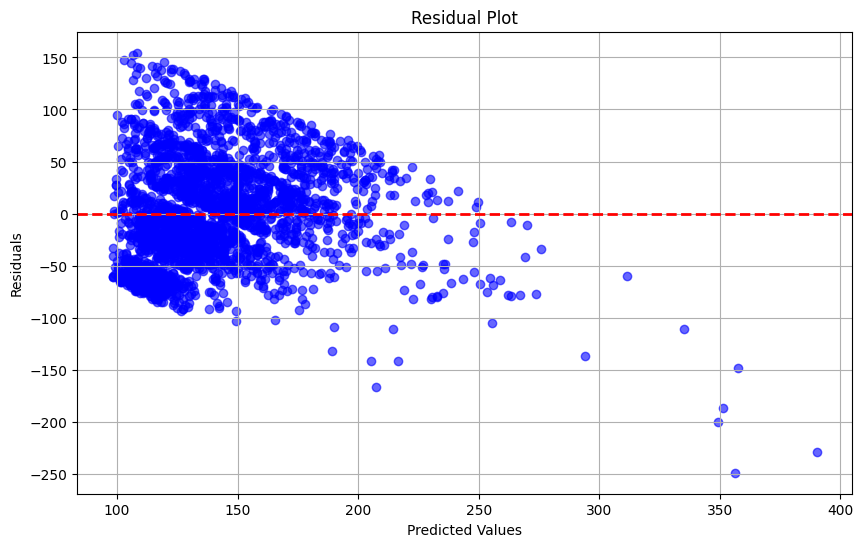

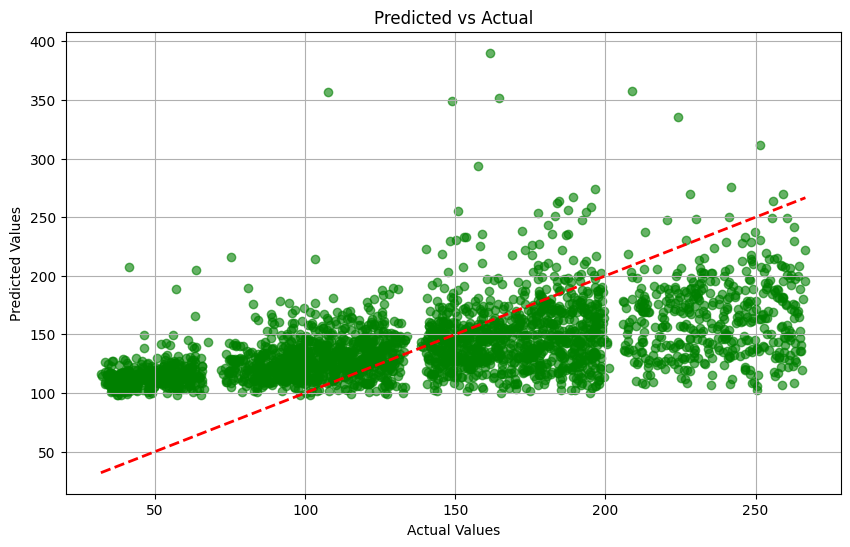

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert Spark DataFrame to Pandas for visualization
lr_predictions_pd = lr_predictions.select("Item_MRP", "prediction").toPandas()

# Residuals
lr_predictions_pd['Residuals'] = lr_predictions_pd['Item_MRP'] - lr_predictions_pd['prediction']

# 1. Residual Plot
plt.figure(figsize=(10, 6))
plt.scatter(lr_predictions_pd['prediction'], lr_predictions_pd['Residuals'], alpha=0.6, color='blue')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

# 2. Predicted vs Actual Plot
plt.figure(figsize=(10, 6))
plt.scatter(lr_predictions_pd['Item_MRP'], lr_predictions_pd['prediction'], alpha=0.6, color='green')
plt.plot([lr_predictions_pd['Item_MRP'].min(), lr_predictions_pd['Item_MRP'].max()],
         [lr_predictions_pd['Item_MRP'].min(), lr_predictions_pd['Item_MRP'].max()],
         color='red', linestyle='--', linewidth=2)  # Line y=x
plt.title('Predicted vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()



2. K-Means Clustering

Inertia (Sum of Squared Distances): 7662532653.537726
Silhouette Score: 0.7643446607370259
Execution Time: 70.12 seconds


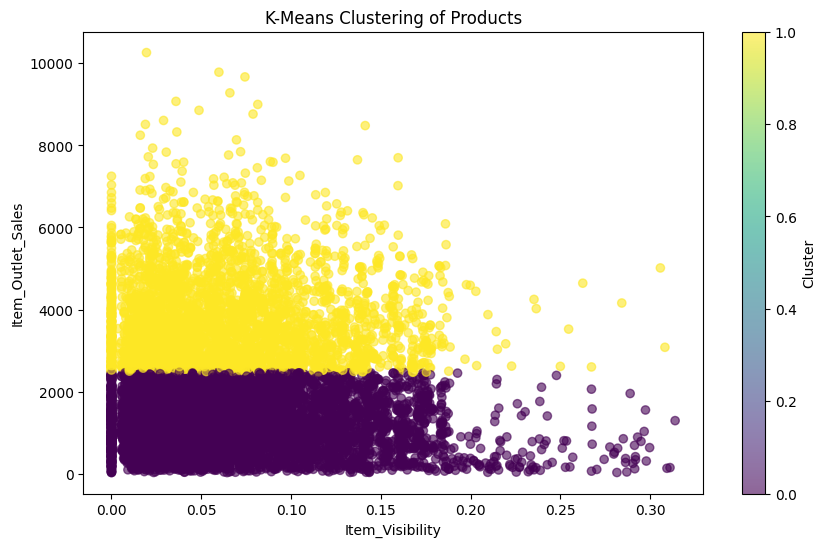

In [ ]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt

# Start Spark session
spark = SparkSession.builder.appName("KMeansClustering").getOrCreate()

# Select relevant features for clustering
feature_columns = ['Item_Visibility', 'Item_Outlet_Sales']
data_features = data.select(feature_columns)

# Assemble features into a single vector
from pyspark.ml.feature import VectorAssembler

assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
data_features = assembler.transform(data_features)

# Apply K-Means clustering
kmeans = KMeans(featuresCol="features", k=2, seed=42)
model = kmeans.fit(data_features)

# Add cluster predictions to DataFrame
predictions = model.transform(data_features)

execution_time = time.time() - start_time

# 1. Evaluation Metrics
# Inertia (Sum of Squared Distances to the Closest Cluster Center)
inertia = model.summary.trainingCost
print(f"Inertia (Sum of Squared Distances): {inertia}")

# Silhouette Score
evaluator = ClusteringEvaluator(featuresCol="features", predictionCol="prediction", metricName="silhouette")
silhouette_score = evaluator.evaluate(predictions)
print(f"Silhouette Score: {silhouette_score}")

print(f"Execution Time: {execution_time:.2f} seconds")

# 2. Visualization
# Convert to Pandas DataFrame for plotting
predictions_pd = predictions.select("Item_Visibility", "Item_Outlet_Sales", "prediction").toPandas()

# Scatter plot of clusters
plt.figure(figsize=(10, 6))
plt.scatter(predictions_pd['Item_Visibility'], predictions_pd['Item_Outlet_Sales'], c=predictions_pd['prediction'], cmap='viridis', alpha=0.6)
plt.title('K-Means Clustering of Products')
plt.xlabel('Item_Visibility')
plt.ylabel('Item_Outlet_Sales')
plt.colorbar(label='Cluster')
plt.show()


In [ ]:
sc = spark.sparkContext

ngrok.set_auth_token("2odSwJKB9BfTPQ2yQi4yvla96tZ_5yHDvJjzdJMAJEFjjJeaP")
# Set up a tunnel to the Spark Web UI
ngrok_tunnel = ngrok.connect(4040)
print(f"Spark Web UI available at {ngrok_tunnel.public_url}")

Spark Web UI available at https://ffd7-34-168-208-216.ngrok-free.app


3. Decision Tree

Training Execution Time: 1.83 seconds
Root Mean Squared Error (RMSE): 45.058816963154065
Mean Squared Error (MSE): 2030.2969861190204
R-squared (R²): 0.4768145088595034


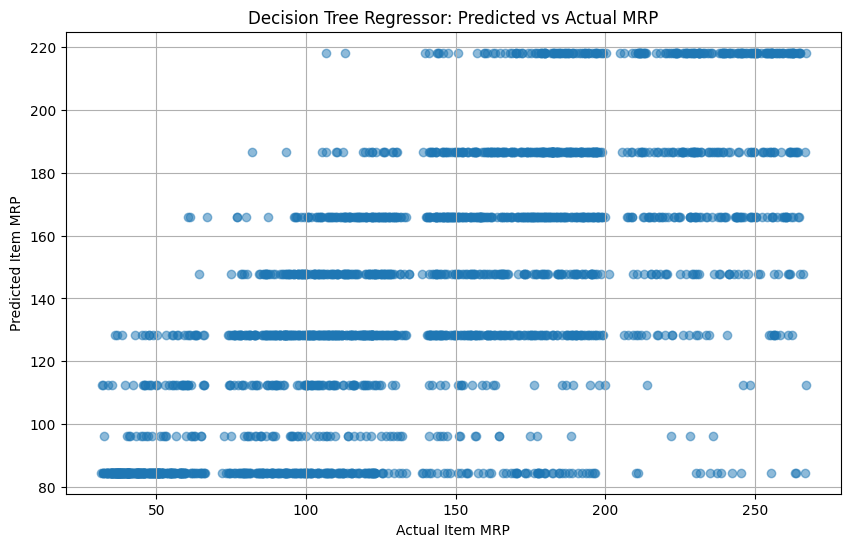

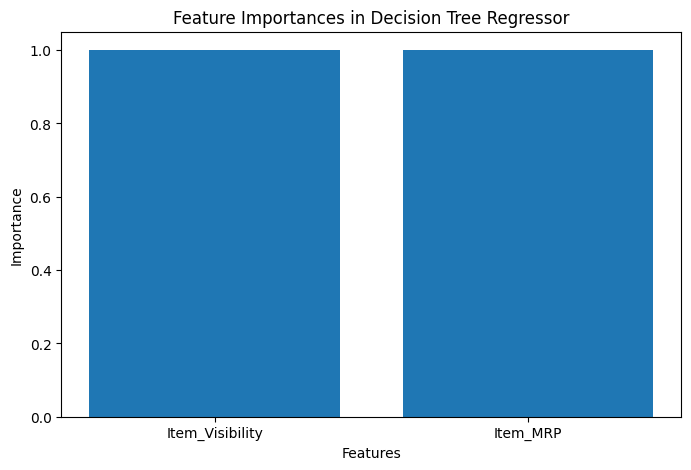

In [ ]:
from pyspark.ml.regression import DecisionTreeRegressor
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.sql import SparkSession
import time

# Initialize Spark Session
spark = SparkSession.builder.appName("DecisionTreeRegressor").getOrCreate()


# Select relevant features for clustering
feature_columns = ['Item_Visibility', 'Item_MRP']
data_features = data.select(feature_columns)

assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
data_features = assembler.transform(data_features)

# Split data into training and testing sets
train_data, test_data = data.randomSplit([0.8, 0.2], seed=42)

# Initialize the Decision Tree Regressor
dt = DecisionTreeRegressor(featuresCol="features", labelCol="Item_MRP", maxDepth=3)

# Measure training execution time
start_time = time.time()
dt_model = dt.fit(train_data)
execution_time = time.time() - start_time
print(f"Training Execution Time: {execution_time:.2f} seconds")

# Make predictions
predictions = dt_model.transform(test_data)

# Evaluate model performance
evaluator_rmse = RegressionEvaluator(labelCol="Item_MRP", predictionCol="prediction", metricName="rmse")
evaluator_mse = RegressionEvaluator(labelCol="Item_MRP", predictionCol="prediction", metricName="mse")
evaluator_r2 = RegressionEvaluator(labelCol="Item_MRP", predictionCol="prediction", metricName="r2")

rmse = evaluator_rmse.evaluate(predictions)
mse = evaluator_mse.evaluate(predictions)
r2 = evaluator_r2.evaluate(predictions)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

# Scatter plot: Predicted vs Actual
predictions_pd = predictions.select("Item_MRP", "prediction").toPandas() # Add this line to select Item_MRP and prediction columns into predictions_pd

plt.figure(figsize=(10, 6))
plt.scatter(predictions_pd["Item_MRP"], predictions_pd["prediction"], alpha=0.5)
plt.xlabel("Actual Item MRP")
plt.ylabel("Predicted Item MRP")
plt.title("Decision Tree Regressor: Predicted vs Actual MRP")
plt.grid(True)
plt.show()

# Feature Importances
importances = dt_model.featureImportances
features = feature_columns

# Create a bar chart for feature importance
plt.figure(figsize=(8, 5))
plt.bar(features, importances)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importances in Decision Tree Regressor")
plt.show()


4. Random Forest

Training Execution Time: 4.76 seconds
Root Mean Squared Error (RMSE): 0.01035913455252594
Mean Squared Error (MSE): 0.00010731166867733683
R-squared (R²): 0.9536711533441228


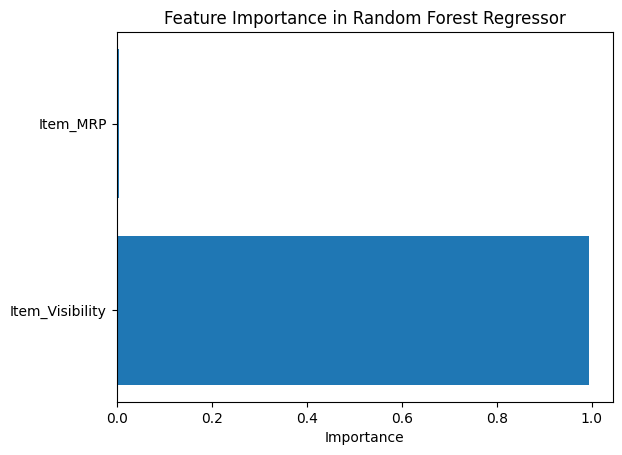

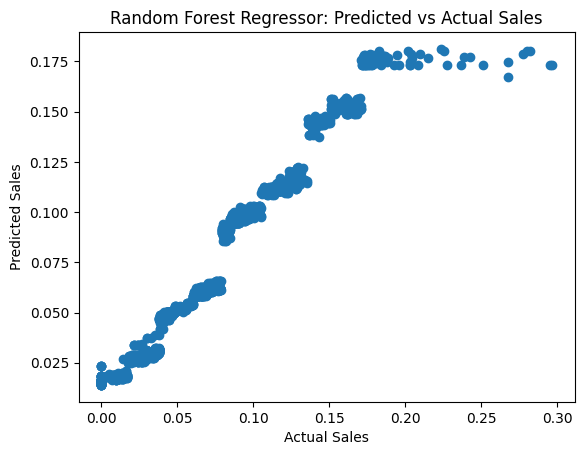

In [ ]:
from pyspark.sql import SparkSession
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.evaluation import RegressionEvaluator
import time
import matplotlib.pyplot as plt

# Initialize Spark session
spark = SparkSession.builder.appName("RandomForestRegressor").getOrCreate()

# Prepare features and label columns
feature_columns = ['Item_Visibility', 'Item_MRP']
data_features = data.select(feature_columns)
data_features = assembler.transform(data_features)

# Split data into training and test sets (80% training, 20% testing)
train_data, test_data = data_features.randomSplit([0.8, 0.2], seed=42)

# Initialize RandomForestRegressor
rf = RandomForestRegressor(featuresCol="features", labelCol="Item_Visibility", numTrees=100)

# Measure training execution time
start_time = time.time()
rf_model = rf.fit(train_data)
execution_time = time.time() - start_time
print(f"Training Execution Time: {execution_time:.2f} seconds")

# Make predictions
predictions = rf_model.transform(test_data)

# Evaluate model performance using RMSE, MSE, and R²
evaluator_rmse = RegressionEvaluator(labelCol="Item_Visibility", predictionCol="prediction", metricName="rmse")
evaluator_mse = RegressionEvaluator(labelCol="Item_Visibility", predictionCol="prediction", metricName="mse")
evaluator_r2 = RegressionEvaluator(labelCol="Item_Visibility", predictionCol="prediction", metricName="r2")

rmse = evaluator_rmse.evaluate(predictions)
mse = evaluator_mse.evaluate(predictions)
r2 = evaluator_r2.evaluate(predictions)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

# Feature importances (can be obtained from model)
importances = rf_model.featureImportances

# Visualizing feature importance
plt.barh(feature_columns, importances)
plt.title('Feature Importance in Random Forest Regressor')
plt.xlabel('Importance')
plt.show()

# Scatter plot of Predicted vs Actual Sales
predictions_pd = predictions.select("Item_Visibility", "prediction").toPandas()
plt.scatter(predictions_pd["Item_Visibility"], predictions_pd["prediction"])
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Random Forest Regressor: Predicted vs Actual Sales')
plt.show()


5. Logistic Regression

Training Execution Time: 3.49 seconds
Accuracy: 0.6776
Precision: 0.6811
Recall: 0.6776
F1 Score: 0.6605
Mean Squared Error (MSE): 0.3473
Root Mean Squared Error (RMSE): 0.5893


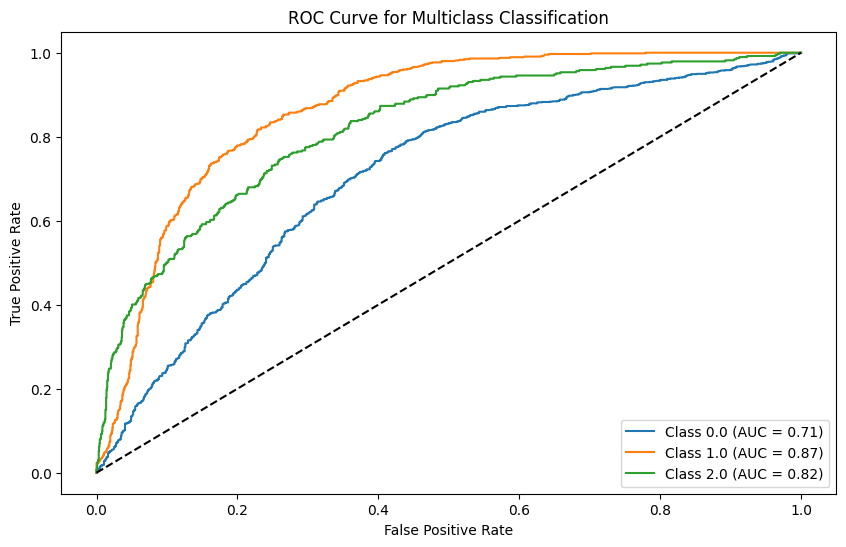

In [ ]:
from pyspark.sql import SparkSession
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.evaluation import MulticlassClassificationEvaluator, RegressionEvaluator
import time
import matplotlib.pyplot as plt
from pyspark.sql.functions import when, col
import pyspark.sql.functions as F
from sklearn.metrics import roc_curve, auc

# Initialize Spark session
spark = SparkSession.builder.appName("LogisticRegression_Spark").getOrCreate()

# Create 'MRP_Category' column based on 'Item_MRP'
data = data.withColumn(
    'MRP_Category',
    F.when((F.col('Item_MRP') > 0) & (F.col('Item_MRP') <= 100), 0)  # Low MRP
    .when((F.col('Item_MRP') > 100) & (F.col('Item_MRP') <= 200), 1)  # Medium MRP
    .when((F.col('Item_MRP') > 200) & (F.col('Item_MRP') <= 500), 2)  # High MRP
    .otherwise(None)  # Handle any value outside the defined range
)

# Prepare features and label columns
feature_columns = ['Item_Outlet_Sales']
if 'features' in data.columns:
    data = data.drop('features')

# Assemble the features into a single vector column
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
data_features = assembler.transform(data)

# Split data into training and testing sets
train_data, test_data = data_features.randomSplit([0.8, 0.2], seed=42)

# Initialize Logistic Regression model
logistic_regression = LogisticRegression(featuresCol="features", labelCol="MRP_Category", maxIter=1000)

# Measure training execution time
start_time = time.time()
lr_model = logistic_regression.fit(train_data)
execution_time = time.time() - start_time
print(f"Training Execution Time: {execution_time:.2f} seconds")

# Make predictions
predictions = lr_model.transform(test_data)

# Evaluate the model
evaluator_accuracy = MulticlassClassificationEvaluator(labelCol="MRP_Category", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator_accuracy.evaluate(predictions)

evaluator_precision = MulticlassClassificationEvaluator(labelCol="MRP_Category", predictionCol="prediction", metricName="weightedPrecision")
precision = evaluator_precision.evaluate(predictions)

evaluator_recall = MulticlassClassificationEvaluator(labelCol="MRP_Category", predictionCol="prediction", metricName="weightedRecall")
recall = evaluator_recall.evaluate(predictions)

evaluator_f1 = MulticlassClassificationEvaluator(labelCol="MRP_Category", predictionCol="prediction", metricName="f1")
f1 = evaluator_f1.evaluate(predictions)

# For MSE and RMSE
evaluator_mse = RegressionEvaluator(labelCol="MRP_Category", predictionCol="prediction", metricName="mse")
mse = evaluator_mse.evaluate(predictions)
rmse = evaluator_mse.setMetricName("rmse").evaluate(predictions)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

# Optional: Visualization (e.g., ROC Curve can be plotted using Spark's AUC function)
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# For plotting ROC Curve
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.feature import StringIndexer

indexer = StringIndexer(inputCol="MRP_Category", outputCol="label")
data_features = indexer.fit(data_features).transform(data_features)

# Split into train/test again after transformation
train_data, test_data = data_features.randomSplit([0.8, 0.2], seed=42)

# Logistic regression for binary classification
logistic_regression = LogisticRegression(featuresCol="features", labelCol="label", maxIter=1000)
lr_model = logistic_regression.fit(train_data)

# Predictions
predictions = lr_model.transform(test_data)

# Get the number of classes
num_classes = len(lr_model.summary.labels) # Assuming 'labels' attribute exists in the summary

# Compute and plot ROC curve for each class
plt.figure(figsize=(10, 6))
for i in range(num_classes):
    # Create binary labels for the current class
    binary_predictions = predictions.withColumn("binary_label", when(col("label") == i, 1.0).otherwise(0.0))

    # Get predicted probabilities for the current class
    class_probs = [row[f"probability"][i] for row in binary_predictions.select("probability").collect()]

    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(binary_predictions.select("binary_label").toPandas(), class_probs)
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f'Class {lr_model.summary.labels[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiclass Classification')
plt.legend(loc="lower right")
plt.show()


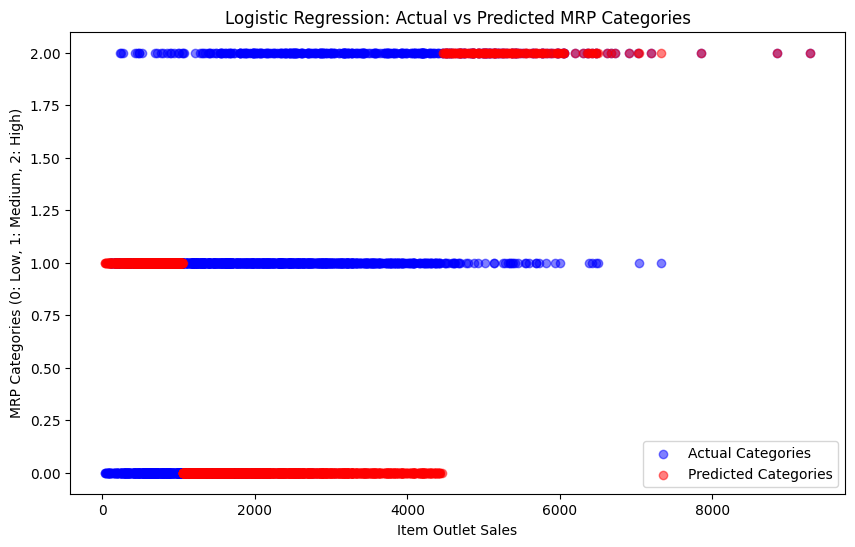

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming predictions DataFrame is already available

# Convert the Spark DataFrame (predictions) to Pandas for plotting
predictions_pd = predictions.select("Item_Outlet_Sales", "MRP_Category", "prediction").toPandas()

# Create a scatter plot
plt.figure(figsize=(10, 6))

# Plot actual categories vs item outlet sales
plt.scatter(predictions_pd["Item_Outlet_Sales"], predictions_pd["MRP_Category"],
            color='blue', label='Actual Categories', alpha=0.5)

# Plot predicted categories vs item outlet sales
plt.scatter(predictions_pd["Item_Outlet_Sales"], predictions_pd["prediction"],
            color='red', label='Predicted Categories', alpha=0.5)

# Set title and labels
plt.title('Logistic Regression: Actual vs Predicted MRP Categories')
plt.xlabel('Item Outlet Sales')
plt.ylabel('MRP Categories (0: Low, 1: Medium, 2: High)')

# Show legend
plt.legend()

# Display the plot
plt.show()


6. Naive Bayes

Training Execution Time: 1.44 seconds
Accuracy: 0.5550
Precision: 0.3080
Recall: 0.5550
F1 Score: 0.3961


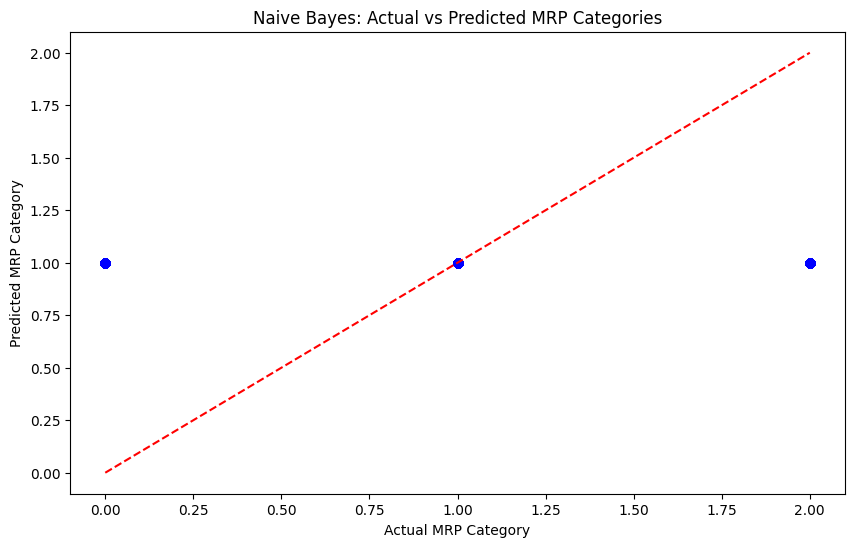

In [ ]:
from pyspark.sql import SparkSession
from pyspark.ml.classification import NaiveBayes
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
import time

# Initialize Spark session
spark = SparkSession.builder.appName("NaiveBayes_Spark").getOrCreate()

# Load your data (replace with your actual dataset)
data = spark.read.csv("/content/Big Sales Data (1).csv", header=True, inferSchema=True)

# Prepare features (example with 'Item_Outlet_Sales' and 'Item_Visibility' as features)
feature_columns = ['Item_Outlet_Sales', 'Item_Visibility']  # Example features
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
data_features = assembler.transform(data)

# Create MRP_Category if not already present
data_features = data_features.withColumn(
    'MRP_Category',
    F.when((F.col('Item_MRP') > 0) & (F.col('Item_MRP') <= 100), 0)  # Low MRP
    .when((F.col('Item_MRP') > 100) & (F.col('Item_MRP') <= 200), 1)  # Medium MRP
    .when((F.col('Item_MRP') > 200) & (F.col('Item_MRP') <= 500), 2)  # High MRP
    .otherwise(None)
)

# Split data into training and testing sets (80% training, 20% testing)
train_data, test_data = data_features.randomSplit([0.8, 0.2], seed=42)

# Initialize Naive Bayes model
nb = NaiveBayes(featuresCol="features", labelCol="MRP_Category", modelType="multinomial")

# Measure training execution time
start_time = time.time()
nb_model = nb.fit(train_data)
execution_time = time.time() - start_time
print(f"Training Execution Time: {execution_time:.2f} seconds")

# Make predictions on test data
predictions = nb_model.transform(test_data)

# Evaluate the model's performance
evaluator_accuracy = MulticlassClassificationEvaluator(labelCol="MRP_Category", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator_accuracy.evaluate(predictions)

evaluator_precision = MulticlassClassificationEvaluator(labelCol="MRP_Category", predictionCol="prediction", metricName="weightedPrecision")
precision = evaluator_precision.evaluate(predictions)

evaluator_recall = MulticlassClassificationEvaluator(labelCol="MRP_Category", predictionCol="prediction", metricName="weightedRecall")
recall = evaluator_recall.evaluate(predictions)

evaluator_f1 = MulticlassClassificationEvaluator(labelCol="MRP_Category", predictionCol="prediction", metricName="f1")
f1 = evaluator_f1.evaluate(predictions)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Optional: Visualization of the predictions (Actual vs Predicted MRP Category)
import matplotlib.pyplot as plt
import numpy as np

# Convert predictions to pandas for plotting
predictions_pd = predictions.select("prediction", "MRP_Category").toPandas()

plt.figure(figsize=(10, 6))
plt.scatter(predictions_pd['MRP_Category'], predictions_pd['prediction'], color='blue', alpha=0.5)
plt.plot([predictions_pd['MRP_Category'].min(), predictions_pd['MRP_Category'].max()],
         [predictions_pd['MRP_Category'].min(), predictions_pd['MRP_Category'].max()], 'r--')  # Line y=x
plt.xlabel('Actual MRP Category')
plt.ylabel('Predicted MRP Category')
plt.title('Naive Bayes: Actual vs Predicted MRP Categories')
plt.show()


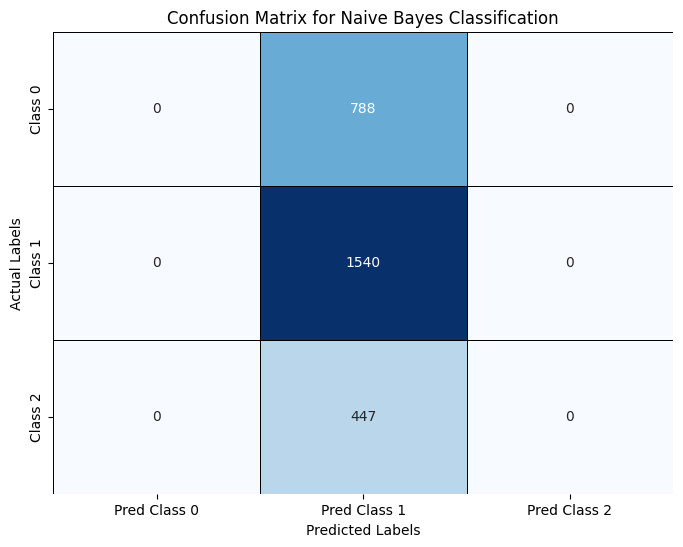

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix

# Convert predictions to pandas for plotting
predictions_pd = predictions.select("MRP_Category", "prediction").toPandas()

# Create confusion matrix
cm = confusion_matrix(predictions_pd["MRP_Category"], predictions_pd["prediction"])

# Create a DataFrame for better visualization in the heatmap
cm_df = pd.DataFrame(cm, index=[f'Class {i}' for i in range(3)], columns=[f'Pred Class {i}' for i in range(3)])

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues", cbar=False, linewidths=0.5, linecolor='black')
plt.title("Confusion Matrix for Naive Bayes Classification")
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.show()


7. Gradient Boosting Regression

Training Time: 87.33 seconds
Prediction Time: 0.15 seconds
Root Mean Squared Error (RMSE): 62.79
Mean Squared Error (MSE): 3942.78
R² (Coefficient of Determination): 0.01


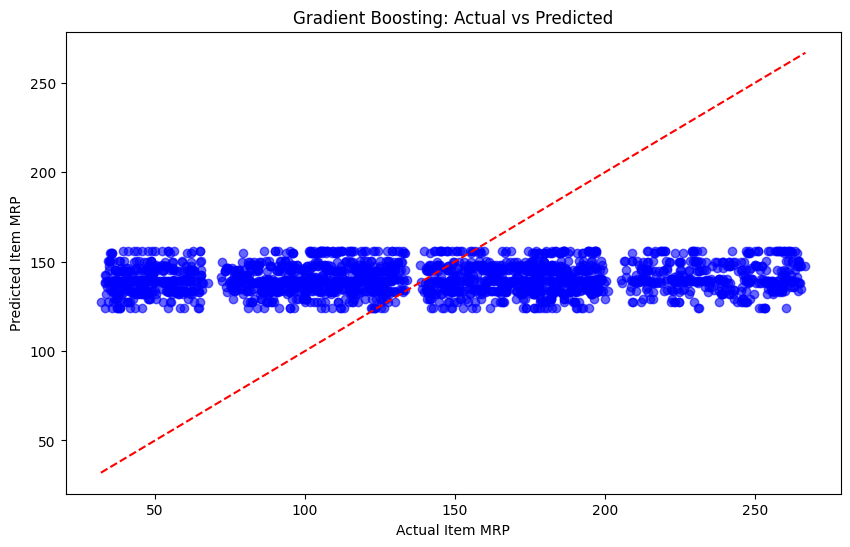

In [ ]:
import time
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import GBTRegressor
from pyspark.ml.evaluation import RegressionEvaluator
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession

# Initialize Spark session
spark = SparkSession.builder.appName("GradientBoosting").getOrCreate()


# Prepare features and label
feature_columns = ['Item_Visibility']  # Replace with your feature columns
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")

# Check if 'features' column already exists and drop it if necessary
if 'features' in data.columns:
    data = data.drop('features')

# Transform the data to create the 'features' column
data = assembler.transform(data).select("features", "Item_MRP")

# Split the data into training and testing sets
train_data, test_data = data.randomSplit([0.8, 0.2], seed=42)

# Initialize Gradient-Boosted Tree Regressor
gbt = GBTRegressor(featuresCol="features", labelCol="Item_MRP", maxIter=100)

# Train the model and measure execution time
start_time = time.time()
gbt_model = gbt.fit(train_data)
training_time = time.time() - start_time
print(f"Training Time: {training_time:.2f} seconds")

# Make predictions
start_time = time.time()
predictions = gbt_model.transform(test_data)
prediction_time = time.time() - start_time
print(f"Prediction Time: {prediction_time:.2f} seconds")

# Evaluate the model
evaluator_rmse = RegressionEvaluator(labelCol="Item_MRP", predictionCol="prediction", metricName="rmse")
evaluator_mse = RegressionEvaluator(labelCol="Item_MRP", predictionCol="prediction", metricName="mse")
evaluator_r2 = RegressionEvaluator(labelCol="Item_MRP", predictionCol="prediction", metricName="r2")

rmse = evaluator_rmse.evaluate(predictions)
mse = evaluator_mse.evaluate(predictions)
r2 = evaluator_r2.evaluate(predictions)

print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² (Coefficient of Determination): {r2:.2f}")

# Visualization: Actual vs Predicted
pandas_predictions = predictions.select("Item_MRP", "prediction").toPandas()

plt.figure(figsize=(10, 6))
plt.scatter(pandas_predictions["Item_MRP"], pandas_predictions["prediction"], alpha=0.6, color="blue")
plt.plot([pandas_predictions["Item_MRP"].min(), pandas_predictions["Item_MRP"].max()],
         [pandas_predictions["Item_MRP"].min(), pandas_predictions["Item_MRP"].max()], 'r--')  # y=x line
plt.xlabel("Actual Item MRP")
plt.ylabel("Predicted Item MRP")
plt.title("Gradient Boosting: Actual vs Predicted")
plt.show()
